In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown https://drive.google.com/uc?id=1F_kgansR4sOW4FYPLHE0BU-yVOTJJDGR

Downloading...
From: https://drive.google.com/uc?id=1F_kgansR4sOW4FYPLHE0BU-yVOTJJDGR
To: /content/kaggle.json
100% 63.0/63.0 [00:00<00:00, 255kB/s]


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 74% 49.0M/66.0M [00:00<00:00, 177MB/s]
100% 66.0M/66.0M [00:00<00:00, 176MB/s]


In [ ]:
! unzip creditcardfraud.zip -d /content/

Archive:  creditcardfraud.zip
  inflating: /content/creditcard.csv  


## 3-3: Implementing the model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil


%matplotlib inline

Reading the dataset

In [ ]:
df = pd.read_csv("/content/creditcard.csv")
df.drop(['Time'],axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


data pre-processing

In [ ]:
X = df.drop(['Class'],axis=1).values
y = df['Class'].values

print(f'Shape of X: {X.shape}')
print(f'Data distribution of Class:\n{df.Class.value_counts()}')

Shape of X: (284807, 29)
Data distribution of Class:
Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# choosing Data of each class
# Class 0
x_0 = X[y==0]
y_0 = y[y==0]
# Class 1
x_1 = X[y==1]
y_1 = y[y==1]

# Split
x0_train, x0_test, y0_train, y0_test = train_test_split(
    x_0,
    y_0,
    test_size=0.2,
    random_state = 54
)
x1_train, x1_test, y1_train, y1_test = train_test_split(
    x_1,
    y_1,
    test_size=0.2,
    random_state = 69
)

Text(0.5, 0.98, "Distribution of Class 'Scam'")

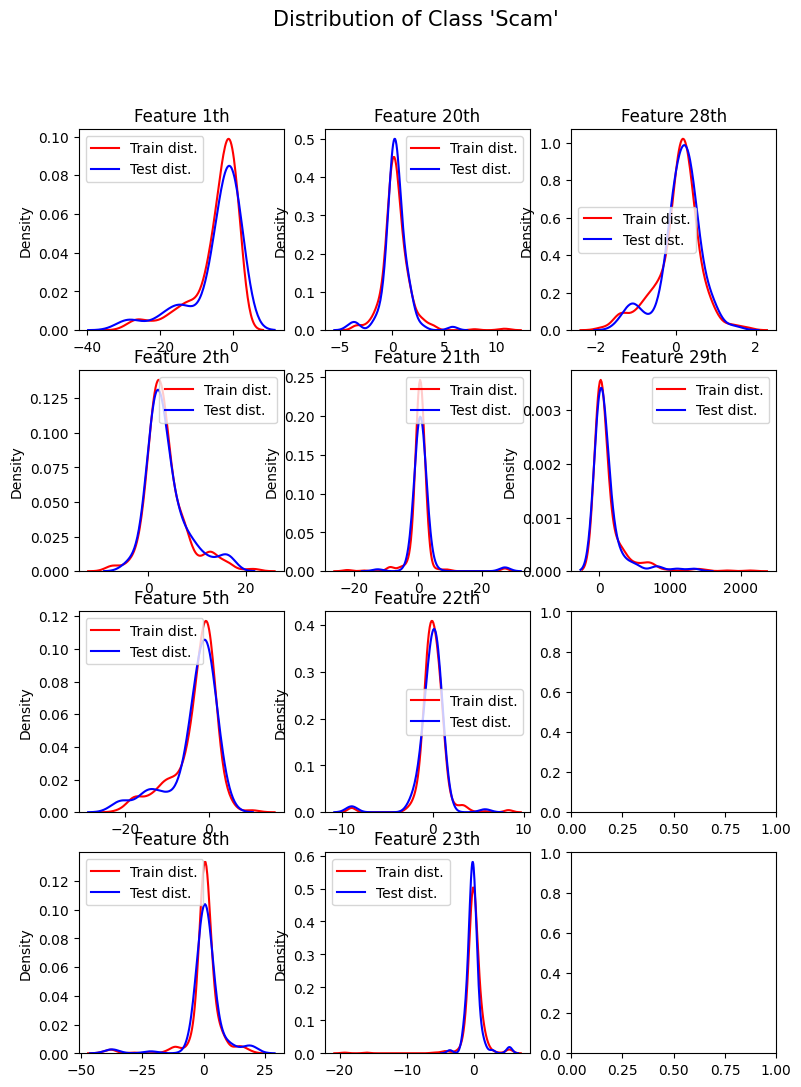

In [ ]:
req_col = [0,1,4,7,19,20,21,22,27,28]
# req_col = np.arange(0,28,1)

h = 4
w =3

train_samples  = x1_train[y1_train==1]
train_ys = y1_train[y1_train==1]
test_samples = x1_test[y1_test==1]
test_ys = y1_test[y1_test==1]
fig, axis = plt.subplots(h,w, figsize=(w*3,h*3))

for j in range(w):
    for i in range(h):

        if i+h*j >=10:
            break
        re = req_col[i+h*j]
        plot_test = test_samples[:,re]
        plot_train = train_samples[:,re]
        sns.kdeplot(plot_train,ax=axis[i,j],color='red', label='Train dist.')
        sns.kdeplot(plot_test,ax=axis[i,j], color='blue', label='Test dist.')
        axis[i,j].legend()
        axis[i,j].set_title(f'Feature {re+1}th')
plt.subplots_adjust(hspace=0.2)
fig.suptitle('Distribution of Class \'Scam\'', fontsize=15)

Mix

In [ ]:
from sklearn.utils import shuffle

In [ ]:
# Stacking
x_train_mix = np.vstack((x0_train,x1_train))
y_train_mix = np.vstack((y0_train.reshape(-1,1),y1_train.reshape(-1,1)))
x_test_mix = np.vstack((x0_test,x1_test))
y_test_mix = np.vstack((y0_test.reshape(-1,1),y1_test.reshape(-1,1)))

# Mixing
x_train_mix, y_train_mix = shuffle(
    x_train_mix,
    y_train_mix,
    random_state=54
)
x_test_mix, y_test_mix = shuffle(
    x_test_mix,
    y_test_mix,
    random_state=54
)

print(f'Shape of train input data: {x_train_mix.shape}')
print(f'Shape of test input data: {x_test_mix.shape}')
df1 = pd.DataFrame(y_train_mix)
df1.columns = ['Class']
df2 = pd.DataFrame(y_test_mix)
df2.columns = ['Class']
print(f'Data distribution of Train data for each class:\n{df1.Class.value_counts()}')
print(f'Data distribution of Test data for each class:\n{df2.Class.value_counts()}')

Shape of train input data: (227845, 29)
Shape of test input data: (56962, 29)
Data distribution of Train data for each class:
Class
0    227452
1       393
Name: count, dtype: int64
Data distribution of Test data for each class:
Class
0    56863
1       99
Name: count, dtype: int64


Normalizing

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_mix)
x_test_scaled = scaler.transform(x_test_mix)

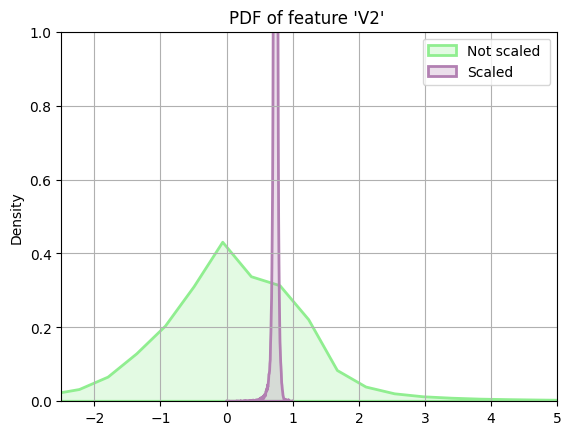

In [ ]:
sns.kdeplot(
    x_train_mix[:,1],
    color='lightgreen',
    linewidth=2,
    fill=True,
    label = 'Not scaled '
)
sns.kdeplot(
    x_train_scaled[:,1],
    color = '#B280B2',
    linewidth = 2,
    fill = True,
    label = 'Scaled'
)
plt.xlim(-2.5,5)
plt.ylim(0,1)
plt.legend()
plt.title('PDF of feature \'V2\' ')
plt.grid()

SMOTE

In [ ]:
from matplotlib import cm

<ipython-input-55-7b888bbd45fe>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2');


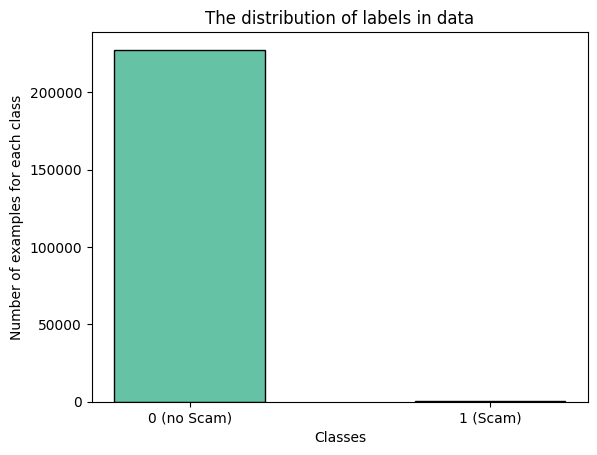

In [ ]:
hist, bins = np.histogram(y_train_mix,bins=2)
cmap = cm.get_cmap('Set2');

bins = np.unique(y_train_mix) # For the bins to come
plt.bar(bins, hist, width=0.5,edgecolor='black',color=cmap(np.linspace(0, 1, len(hist))));
plt.xticks(range(0,2), ['0 (no Scam)', '1 (Scam)']);
plt.title('The distribution of labels in data')
plt.ylabel('Number of examples for each class')
plt.xlabel('Classes');

In [ ]:
balancer = SMOTE(random_state=42)
x_train_smote, y_train_smote = balancer.fit_resample(x_train_scaled, y_train_mix)

print(f'Shape of RESAMPLED X: {x_train_smote.shape}')
df1 = pd.DataFrame(y_train_smote)
df1.columns = ['Class']
print(f'Data distribution of RESAMPLED Class:\n{df1.Class.value_counts()}')

Shape of RESAMPLED X: (454904, 29)
Data distribution of RESAMPLED Class:
Class
0    227452
1    227452
Name: count, dtype: int64


Text(0.5, 0.98, "Distribution of Class 'Scam'")

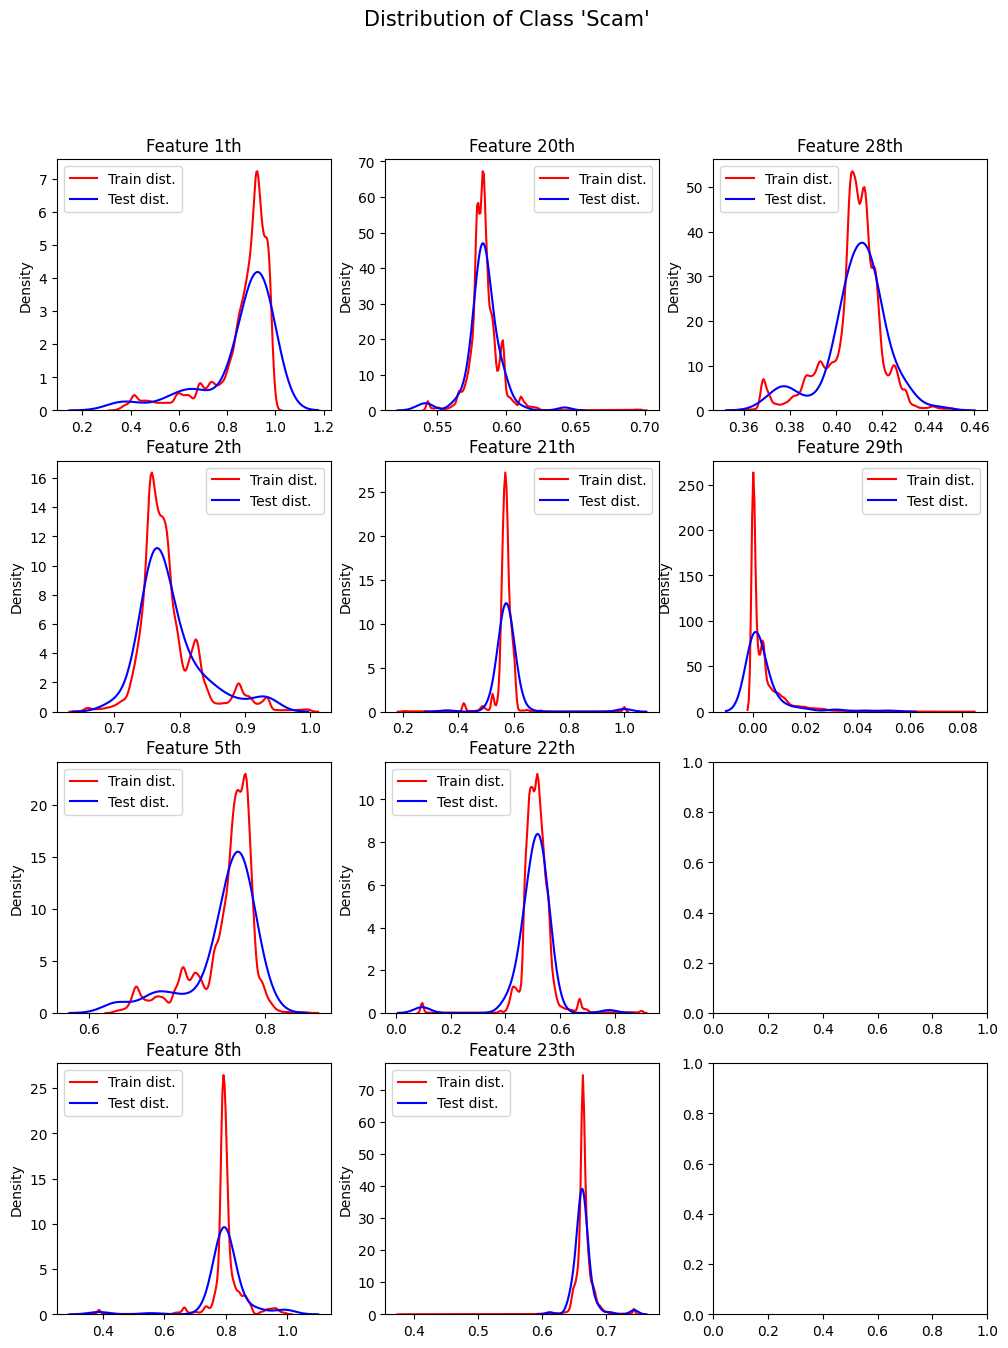

In [ ]:
req_col = [0,1,4,7,19,20,21,22,27,28]



train_samples  = x_train_smote[y_train_smote==1]
train_ys = y_train_smote[y_train_smote==1]
test_samples = x_test_scaled[y_test_mix.reshape(-1,)==1]
test_ys = y_test_mix.reshape(-1,)[y_test_mix.reshape(-1,)==1]
fig, axis = plt.subplots(4,3, figsize=(12,15))
jj = [range(15)]*2
jjj = []
for j in range(3):
    for i in range(4):

        if i+4*j >=10:
            break
        re = req_col[i+4*j]
        plot_test = test_samples[:,re]
        plot_train = train_samples[:,re]
        sns.kdeplot(plot_train,ax=axis[i,j],color='red', label='Train dist.')
        sns.kdeplot(plot_test,ax=axis[i,j], color='blue', label='Test dist.')
        axis[i,j].legend()
        axis[i,j].set_title(f'Feature {re+1}th')
plt.subplots_adjust(hspace=0.2)
fig.suptitle('Distribution of Class \'Scam\'', fontsize=15)


In [ ]:
from imblearn.over_sampling import SMOTE

<ipython-input-28-03e050d6d99c>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2');


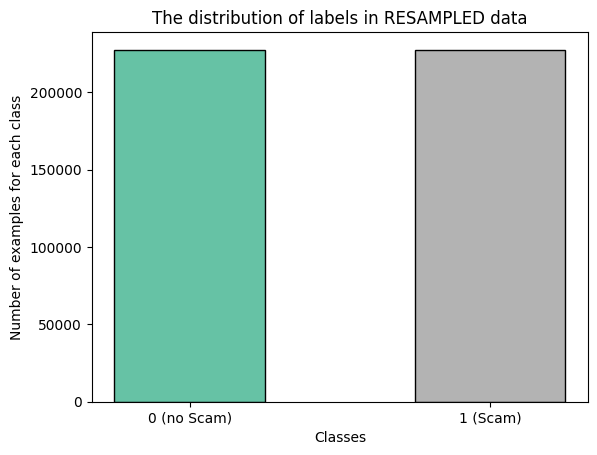

In [ ]:
hist, bins = np.histogram(y_train_smote,bins=2)
cmap = cm.get_cmap('Set2');

bins = np.unique(y_train_smote) # For the bins to come
plt.bar(bins, hist, width=0.5,edgecolor='black',color=cmap(np.linspace(0, 1, len(hist))));
plt.xticks(range(0,2), ['0 (no Scam)', '1 (Scam)']);
plt.title('The distribution of labels in RESAMPLED data')
plt.ylabel('Number of examples for each class')
plt.xlabel('Classes');

Check distribution of data for each class

Reducing samples of data

In [ ]:
x0r, _, y0r, _ = train_test_split(x0_train,y0_train, train_size=1000/200000, random_state=54, shuffle=True)

# Stacking
x_mix = np.vstack((x0r,x1_train))
y_mix = np.vstack((y0r.reshape(-1,1),y1_train.reshape(-1,1)))

SMOTE again

In [ ]:
balancer = SMOTE(random_state=42)
x_smote, y_smote = balancer.fit_resample(x_mix, y_mix)

print(f'Shape of RESAMPLED X: {x_smote.shape}')
df1 = pd.DataFrame(y_smote)
df1.columns = ['Class']
print(f'Data distribution of RESAMPLED Class:\n{df1.Class.value_counts()}')

Shape of RESAMPLED X: (2274, 29)
Data distribution of RESAMPLED Class:
Class
0    1137
1    1137
Name: count, dtype: int64


In [ ]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
x_smote = scaler.fit_transform(x_smote)
x_test_scaled = scaler.transform(x_test_mix)

Text(0.5, 0.98, "Distribution of Class 'Scam'")

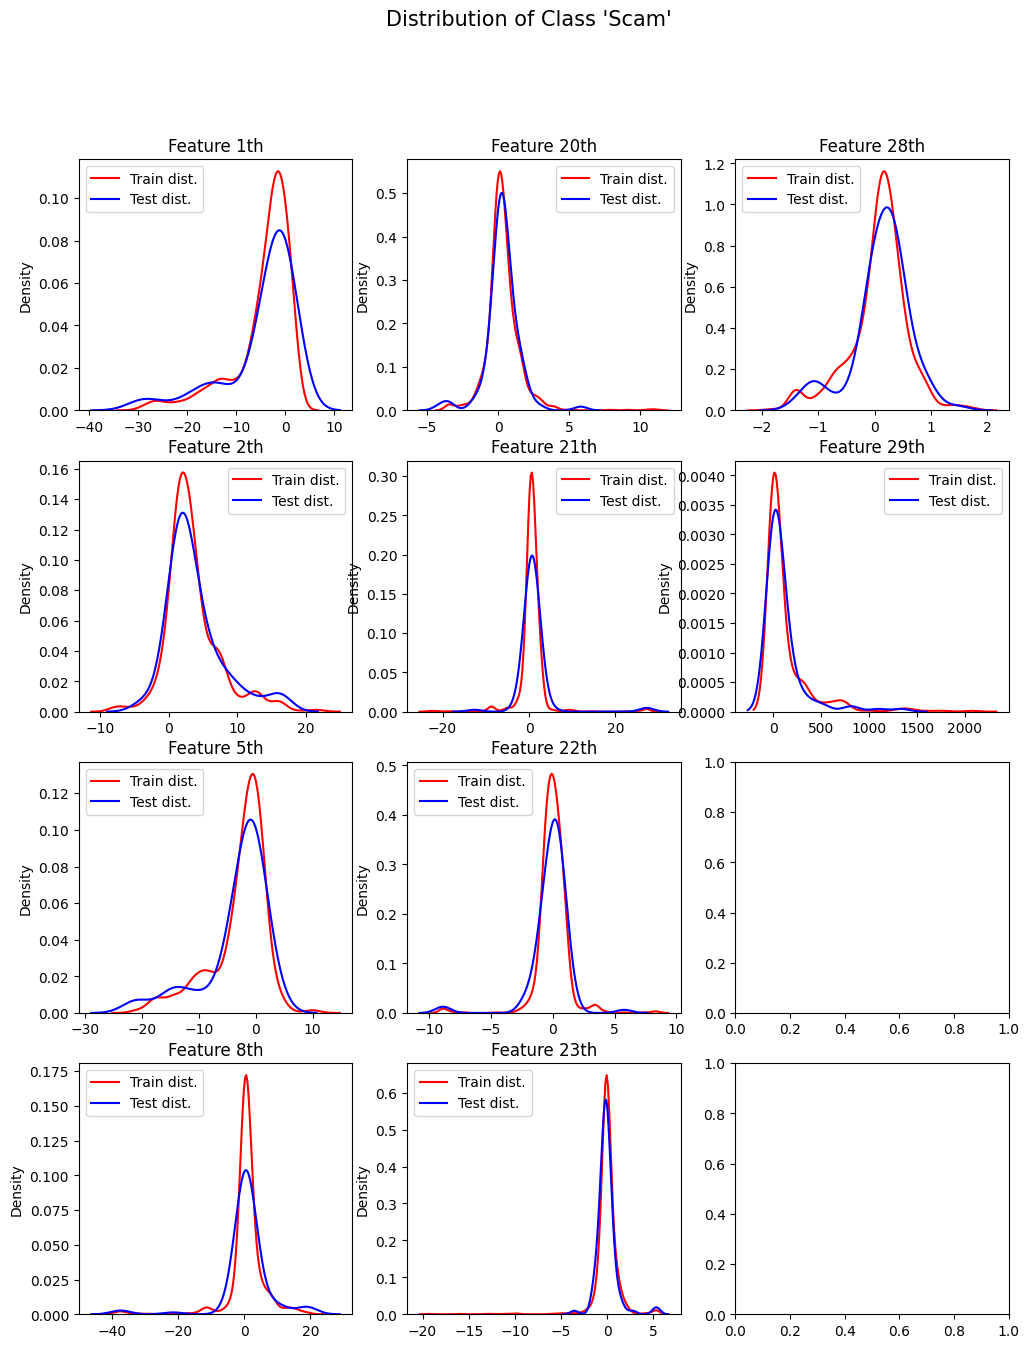

In [ ]:
req_col = [0,1,4,7,19,20,21,22,27,28]



train_samples  = x_smote[y_smote==1]
train_ys = y_smote[y_smote==1]
test_samples = x_test_mix[y_test_mix.reshape(-1,)==1]
test_ys = y_test_mix.reshape(-1,)[y_test_mix.reshape(-1,)==1]
fig, axis = plt.subplots(4,3, figsize=(12,15))
jj = [range(15)]*2
jjj = []
for j in range(3):
    for i in range(4):

        if i+4*j >=10:
            break
        re = req_col[i+4*j]
        plot_test = test_samples[:,re]
        plot_train = train_samples[:,re]
        sns.kdeplot(plot_train,ax=axis[i,j],color='red', label='Train dist.')
        sns.kdeplot(plot_test,ax=axis[i,j], color='blue', label='Test dist.')
        axis[i,j].legend()
        axis[i,j].set_title(f'Feature {re+1}th')
plt.subplots_adjust(hspace=0.2)
fig.suptitle('Distribution of Class \'Scam\'', fontsize=15)


Text(0.5, 0.98, "Distribution of Class 'non-Scam'")

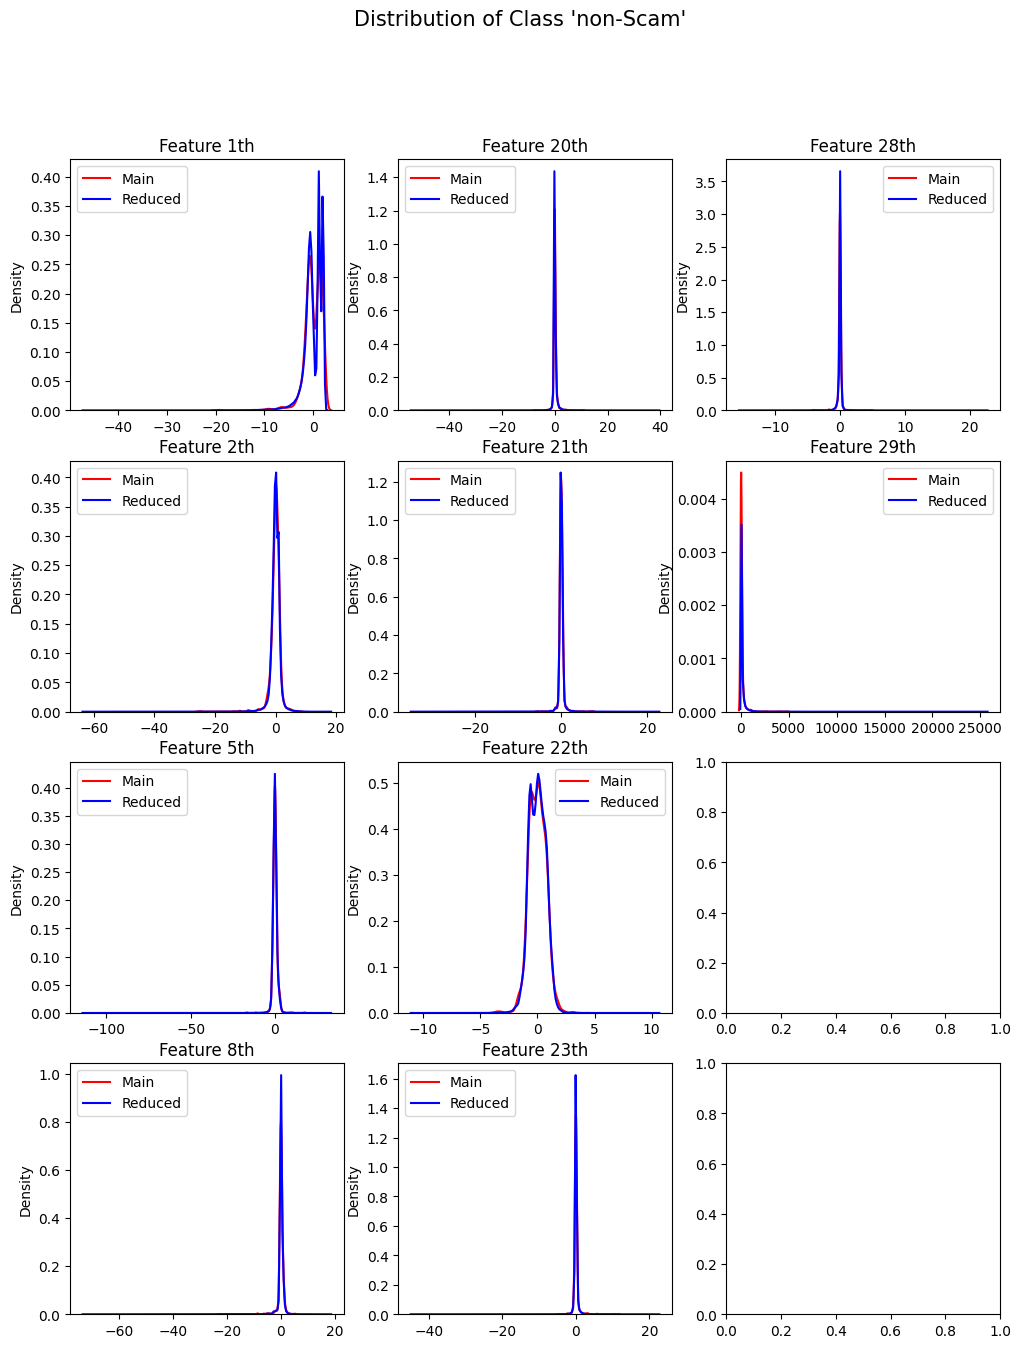

In [ ]:
req_col = [0,1,4,7,19,20,21,22,27,28]



train_samples  = x_smote[y_smote==0]
train_ys = y_smote[y_smote==0]
test_samples = x0_train[y0_train==0]
test_ys = y0_train[y0_train==0]
fig, axis = plt.subplots(4,3, figsize=(12,15))
jj = [range(15)]*2
jjj = []
for j in range(3):
    for i in range(4):

        if i+4*j >=10:
            break
        re = req_col[i+4*j]
        plot_test = test_samples[:,re]
        plot_train = train_samples[:,re]
        sns.kdeplot(plot_train,ax=axis[i,j],color='red', label='Main')
        sns.kdeplot(plot_test,ax=axis[i,j], color='blue', label='Reduced')
        axis[i,j].legend()
        axis[i,j].set_title(f'Feature {re+1}th')
plt.subplots_adjust(hspace=0.2)
fig.suptitle('Distribution of Class \'non-Scam\'', fontsize=15)

Correcting the data

In [ ]:
x_train_smote, y_train_smote = shuffle(
    x_smote,
    y_smote,
    random_state = 54
)

Denoising AE

In [ ]:
from tensorflow.random import set_seed
set_seed(54)

In [ ]:
np.random.seed(54)
x_train_smosy = x_train_smote + np.random.rand(x_train_smote.shape[0],x_train_smote.shape[1])*0.01
# x_test_noisy = x_test_scaled + np.random.rand(x_test_scaled.shape[0],x_test_scaled.shape[1])*0.01

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam

In [ ]:
# Model design
autoencoder = Sequential(
    [
        Input(shape=(x_train_scaled.shape[1],), name='IN'),
        Dense(22, activation='relu', name='EC_1'),
        Dense(15, activation='relu', name='EC_2'),
        Dense(10, activation='relu', name='Latent'),
        Dense(15, activation='relu', name='DC_1'),
        Dense(22, activation='relu', name='DC_2'),
        Dense(x_train_scaled.shape[1], activation='sigmoid', name='OUT')
    ],
    name = 'Autoencoder'
)

autoencoder.compile(
    loss = MeanSquaredError(),
    optimizer = Adam(learning_rate=0.001)
)

autoencoder.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 EC_1 (Dense)                (None, 22)                660       
                                                                 
 EC_2 (Dense)                (None, 15)                345       
                                                                 
 Latent (Dense)              (None, 10)                160       
                                                                 
 DC_1 (Dense)                (None, 15)                165       
                                                                 
 DC_2 (Dense)                (None, 22)                352       
                                                                 
 OUT (Dense)                 (None, 29)                667       
                                                                 
Total params: 2349 (9.18 KB)
Trainable params: 2349 (9.

In [ ]:
from tensorflow.keras import callbacks
from tensorflow.keras.models import clone_model

In [ ]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3,verbose=1)
checkpoint = callbacks.ModelCheckpoint(
    'best_model_weights.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=0
)

In [ ]:
history = autoencoder.fit(
    x_train_smosy,
    x_train_smote,
    epochs = 30,
    batch_size = 4,
    validation_data = (x_test_scaled, x_test_scaled),
    callbacks = [checkpoint, early_stopping]
)


Epoch 1/30
569/569 [==============================] - 24s 40ms/step - loss: 0.0134 - val_loss: 0.0049
Epoch 2/30
 77/569 [===>..........................] - ETA: 0s - loss: 0.0076

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


569/569 [==============================] - 22s 38ms/step - loss: 0.0069 - val_loss: 0.0048
Epoch 3/30
569/569 [==============================] - 21s 37ms/step - loss: 0.0065 - val_loss: 0.0047
Epoch 4/30
569/569 [==============================] - 20s 35ms/step - loss: 0.0058 - val_loss: 0.0044
Epoch 5/30
569/569 [==============================] - 42s 74ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 6/30
569/569 [==============================] - 22s 38ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 7/30
569/569 [==============================] - 20s 35ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 8/30
569/569 [==============================] - 20s 35ms/step - loss: 0.0044 - val_loss: 0.0037
Epoch 9/30
569/569 [==============================] - 22s 39ms/step - loss: 0.0041 - val_loss: 0.0035
Epoch 10/30
569/569 [==============================] - 22s 38ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 11/30
569/569 [==============================] - 21s 37ms/step - loss: 0.0038 - val_lo

In [ ]:
# if os.path.isfile('/content/autoencoder.h5'):
#     os.remove('/content/autoencoder.h5')
# autoencoder.save('autoencoder.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# if os.path.isfile('/content/drive/MyDrive/ML_Aliyari/Mini_Project_3/autoencoder.h5'):
#     os.remove('/content/drive/MyDrive/ML_Aliyari/Mini_Project_3/autoencoder.h5')
# shutil.copy('/content/autoencoder.h5', '/content/drive/MyDrive/ML_Aliyari/Mini_Project_3/')

'/content/drive/MyDrive/ML_Aliyari/Mini_Project_3/autoencoder.h5'

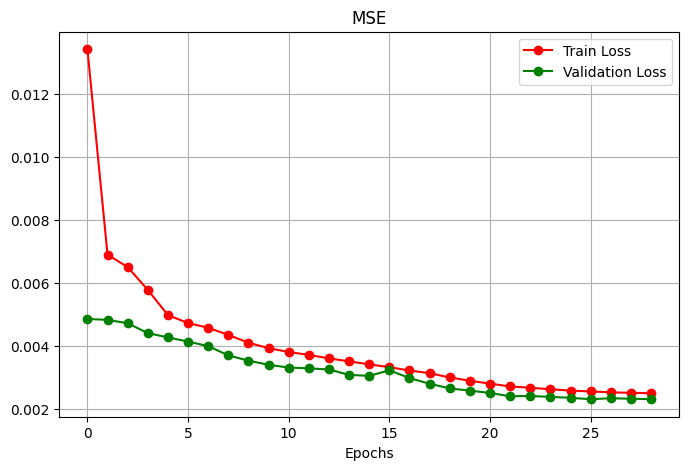

In [ ]:
# Train
train_loss = history.history['loss']
# Validation
val_loss = history.history['val_loss']

# Plotting Loss
plt.figure(figsize=(8,5))
plt.plot(train_loss, 'r-o', label='Train Loss')
plt.plot(val_loss, 'g-o', label='Validation Loss')
plt.title('MSE')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

MLP classifier

In [ ]:
from tensorflow.keras import metrics
from tensorflow import argmax, math, equal, cast, reduce_sum, logical_and, float32

Denoising input data

In [ ]:
# !gdown https://drive.google.com/uc?id=1RY9R_A13aRJctOOcyDKG9U7_Ph80tj9G

Downloading...
From: https://drive.google.com/uc?id=1RY9R_A13aRJctOOcyDKG9U7_Ph80tj9G
To: /content/autoencoder.h5
100% 83.0k/83.0k [00:00<00:00, 13.7MB/s]


In [ ]:
# from tensorflow.keras.models import load_model
# auto = load_model('/content/autoencoder.h5')
# x_train_denoised = auto.predict(x_train_noisy)
# x_test_denoised = auto.predict(x_test_scaled)


14217/14217 [==============================] - 107s 7ms/step


In [ ]:
x_train_denoised = autoencoder.predict(x_train_smosy)
x_test_denoised = autoencoder.predict(x_test_scaled)

1781/1781 [==============================] - 3s 1ms/step


In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy, MeanSquaredError
from tensorflow.keras.optimizers import SGD


In [ ]:
classifier = Sequential(
    [
        Input(shape=(x_train_scaled.shape[1],), name='IN'),
        Dense(22, activation='relu', name='Dense_1'),
        Dense(15, activation='relu', name='Dense_2'),
        Dense(10, activation='relu', name='Dense_3'),
        Dense(5, activation='relu', name='Dense_4'),
        Dense(2, activation='softmax', name='Classifier')
    ],
    name = 'CLASSIFIER'
)

classifier.compile(
    loss = SparseCategoricalCrossentropy(),
    optimizer = Adam(learning_rate=0.001),
    metrics = ['acc']
)

classifier.summary()

Model: "CLASSIFIER"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 22)                660       
                                                                 
 Dense_2 (Dense)             (None, 15)                345       
                                                                 
 Dense_3 (Dense)             (None, 10)                160       
                                                                 
 Dense_4 (Dense)             (None, 5)                 55        
                                                                 
 Classifier (Dense)          (None, 2)                 12        
                                                                 
Total params: 1232 (4.81 KB)
Trainable params: 1232 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
early_stopping_2 = callbacks.EarlyStopping(monitor='val_acc', patience=6)
checkpoint_2 = callbacks.ModelCheckpoint(
    'best_classifier_weights.h5',
    monitor='val_acc',
    save_best_only=True,
    mode='max',
    verbose=0
)

In [ ]:
# from tensorflow.keras.utils import to_categorical
# y_train_cat = to_categorical(y_train_smote)

In [ ]:
# set_seed(69)
history_class = classifier.fit(
    x_train_denoised,
    y_train_smote,
    epochs = 30,
    batch_size = 128,
    validation_data = (x_test_denoised, y_test_mix),
    callbacks = [checkpoint_2, early_stopping_2]
)

Epoch 1/30
18/18 [==============================] - 3s 102ms/step - loss: 0.6926 - acc: 0.4930 - val_loss: 0.7071 - val_acc: 0.0017
Epoch 2/30
16/18 [=========================>....] - ETA: 0s - loss: 0.6822 - acc: 0.5000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 1s 59ms/step - loss: 0.6815 - acc: 0.5084 - val_loss: 0.6956 - val_acc: 0.3988
Epoch 3/30
18/18 [==============================] - 1s 41ms/step - loss: 0.6628 - acc: 0.7590 - val_loss: 0.6857 - val_acc: 0.7737
Epoch 4/30
18/18 [==============================] - 1s 41ms/step - loss: 0.6263 - acc: 0.8685 - val_loss: 0.6689 - val_acc: 0.9098
Epoch 5/30
18/18 [==============================] - 1s 57ms/step - loss: 0.5670 - acc: 0.8940 - val_loss: 0.6257 - val_acc: 0.9818
Epoch 6/30
18/18 [==============================] - 1s 83ms/step - loss: 0.4909 - acc: 0.9270 - val_loss: 0.5569 - val_acc: 0.9926
Epoch 7/30
18/18 [==============================] - 1s 82ms/step - loss: 0.3927 - acc: 0.9270 - val_loss: 0.3194 - val_acc: 0.9988
Epoch 8/30
18/18 [==============================] - 1s 42ms/step - loss: 0.2926 - acc: 0.9151 - val_loss: 0.1977 - val_acc: 0.9987
Epoch 9/30
18/18 [==============================] - 1s 38ms/step - loss: 0.2403 - acc: 0.9173 

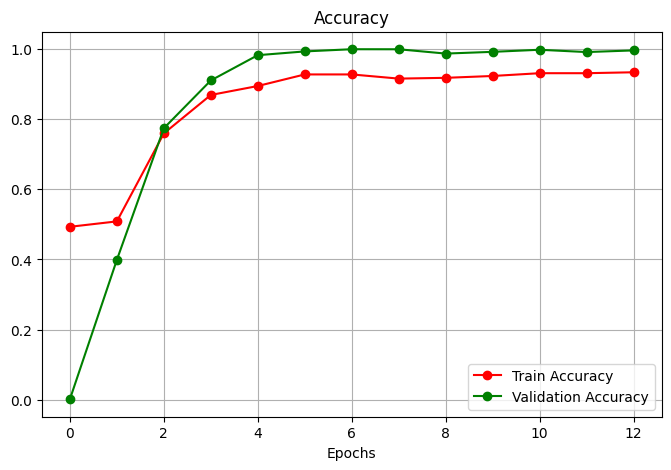

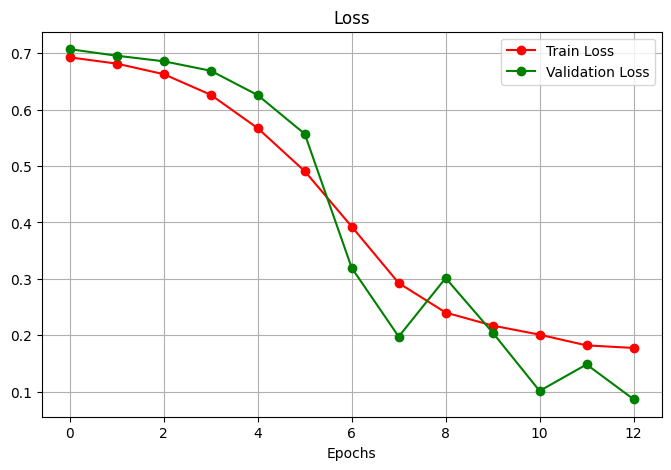

In [ ]:
# Train
train_acc = history_class.history['acc']
train_loss = history_class.history['loss']
# Validation
val_acc = history_class.history['val_acc']
val_loss = history_class.history['val_loss']

# Plotting section
# Accuracy
plt.figure(figsize=(8,5))
plt.plot(train_acc, 'r-o', label='Train Accuracy')
plt.plot(val_acc, 'g-o', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
# Loss
plt.figure(figsize=(8,5))
plt.plot(train_loss, 'r-o', label='Train Loss')
plt.plot(val_loss, 'g-o', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

In [ ]:
# if os.path.isdir('/content/classifier.h5'):
#     os.remove('/content/classifier.h5')

# classifier.save('classifier.h5')

In [ ]:
# if os.path.isdir('/content/drive/MyDrive/ML_Aliyari/Mini_Project_3/classifier.h5'):
#     os.remove('/content/drive/MyDrive/ML_Aliyari/Mini_Project_3/classifier.h5')
# shutil.copy('/content/classifier.h5', '/content/drive/MyDrive/ML_Aliyari/Mini_Project_3/')

'/content/drive/MyDrive/ML_Aliyari/Mini_Project_3/classifier.h5'

## 3-4: model performance

In [ ]:
# !gdown https://drive.google.com/uc?id=1-1U_HRFat44k2qYyDU4YNBg2L1RXmsg7

Downloading...
From: https://drive.google.com/uc?id=1-1U_HRFat44k2qYyDU4YNBg2L1RXmsg7
To: /content/classifier.h5
100% 62.2k/62.2k [00:00<00:00, 4.05MB/s]


In [ ]:
# from tensorflow.keras.models import load_model
# classi = load_model('/content/classifier.h5')

In [ ]:
y_hat_train = classifier(x_train_denoised)
y_hat = classifier.predict(x_test_denoised)

1781/1781 [==============================] - 3s 1ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
report = classification_report(y_test_mix, np.argmax(y_hat,axis=1), target_names=['no Scam', 'Scam'])
report_train = classification_report(y_train_smote, np.argmax(y_hat_train,axis=1), target_names=['no Scam', 'Scam'])

print(f'Classification report for Train Data\n{report_train}')
print(f'Classification report for Test Data\n{report}')

Classification report for Train Data
              precision    recall  f1-score   support

     no Scam       0.89      0.99      0.94      1137
        Scam       0.99      0.87      0.93      1137

    accuracy                           0.93      2274
   macro avg       0.94      0.93      0.93      2274
weighted avg       0.94      0.93      0.93      2274

Classification report for Test Data
              precision    recall  f1-score   support

     no Scam       1.00      1.00      1.00     56863
        Scam       0.26      0.88      0.40        99

    accuracy                           1.00     56962
   macro avg       0.63      0.94      0.70     56962
weighted avg       1.00      1.00      1.00     56962



Text(0.5, 1.0, 'Confusion Matrix for Test data')

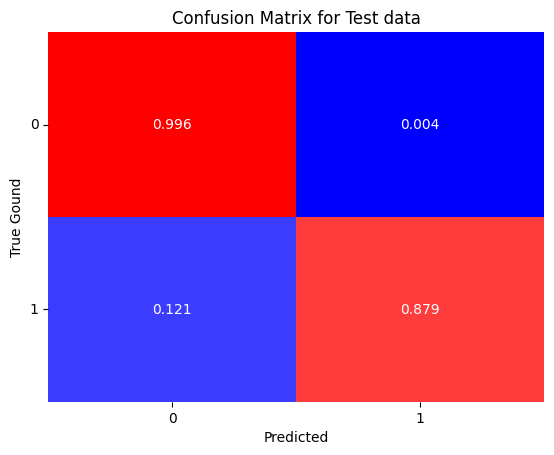

In [ ]:
cm = confusion_matrix(y_test_mix, np.argmax(y_hat,axis=1))
cm = cm/np.sum(cm, axis=1).reshape(-1,1)
# Plotting confusion matrix
sns.heatmap(cm, annot=True, cmap='bwr', fmt='.3f',cbar=False);
plt.xticks(np.array(range(0,2)).astype('float32')+0.5, range(0,2));
plt.yticks(np.array(range(0,2)).astype('float32')+0.5, range(0,2), rotation=0);
plt.xlabel('Predicted')
plt.ylabel('True Gound')
plt.title('Confusion Matrix for Test data')

## 3-5: The curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score

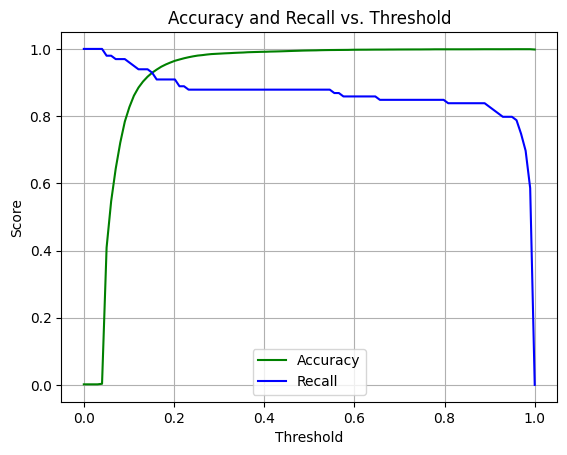

In [ ]:
# Make predictions on the validation or test data
y_pred = y_hat[:,1]
# Initialize arrays to store accuracy and recall values
thresholds = np.linspace(0, 1, 100)
accuracies = []
recalls = []

# Iterate over different thresholds
for threshold in thresholds:
    y_pred_binary = (y_pred > threshold).astype(int)
    accuracies.append(accuracy_score(y_test_mix, y_pred_binary))
    recalls.append(recall_score(y_test_mix, y_pred_binary))

# Plot accuracy and recall based on the threshold
plt.plot(thresholds, accuracies,'g-', label='Accuracy')
plt.plot(thresholds, recalls,'b', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Accuracy and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


## 3-6: Unbalanced performance

Data split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    shuffle = True,
    random_state = 54
)

print(f'Shape of train input data: {x_train.shape}')
print(f'Shape of test input data: {x_test.shape}')

Shape of train input data: (227845, 29)
Shape of test input data: (56962, 29)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
classifier_2 = Sequential(
    [
        Input(shape=(x_train_scaled.shape[1],), name='IN'),
        Dense(22, activation='relu', name='Dense_1'),
        Dense(15, activation='relu', name='Dense_2'),
        Dense(10, activation='relu', name='Dense_3'),
        Dense(5, activation='relu', name='Dense_4'),
        Dense(2, activation='softmax', name='Classifier')
    ],
    name = 'CLASSIFIER'
)

classifier_2.summary()

Model: "CLASSIFIER"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 22)                660       
                                                                 
 Dense_2 (Dense)             (None, 15)                345       
                                                                 
 Dense_3 (Dense)             (None, 10)                160       
                                                                 
 Dense_4 (Dense)             (None, 5)                 55        
                                                                 
 Classifier (Dense)          (None, 2)                 12        
                                                                 
Total params: 1232 (4.81 KB)
Trainable params: 1232 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import callbacks

In [ ]:
early_stopping_2 = callbacks.EarlyStopping(monitor='val_acc', patience=3)
checkpoint_2 = callbacks.ModelCheckpoint(
    'best_model_weights.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [ ]:
classifier_2.compile(
    loss = SparseCategoricalCrossentropy(),
    optimizer = Adam(learning_rate=0.001),
    metrics = ['acc']
)

In [ ]:
x_train_noisy = x_train_scaled + np.random.rand(x_train_scaled.shape[0],x_train_scaled.shape[1])*0.01
x_test_noisy = x_test_scaled + np.random.rand(x_test_scaled.shape[0],x_test_scaled.shape[1])*0.01

In [ ]:
history_class_2 = classifier_2.fit(
    x_train_noisy,
    y_train,
    epochs = 30,
    batch_size = 128,
    validation_data = (x_test_scaled, y_test),
    callbacks = [checkpoint_2, early_stopping_2]
)

Epoch 1/30
1776/1781 [============================>.] - ETA: 0s - loss: 0.0027 - acc: 0.9994
Epoch 1: val_loss improved from 0.00365 to 0.00345, saving model to best_model_weights.h5
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0026 - acc: 0.9994 - val_loss: 0.0034 - val_acc: 0.9994
Epoch 2/30
1763/1781 [============================>.] - ETA: 0s - loss: 0.0024 - acc: 0.9995
Epoch 2: val_loss improved from 0.00345 to 0.00331, saving model to best_model_weights.h5
1781/1781 [==============================] - 6s 3ms/step - loss: 0.0025 - acc: 0.9995 - val_loss: 0.0033 - val_acc: 0.9993
Epoch 3/30
1776/1781 [============================>.] - ETA: 0s - loss: 0.0024 - acc: 0.9995
Epoch 3: val_loss improved from 0.00331 to 0.00313, saving model to best_model_weights.h5
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0024 - acc: 0.9995 - val_loss: 0.0031 - val_acc: 0.9994
Epoch 4/30
1780/1781 [============================>.] - ETA: 0s - loss: 0.0022 - a

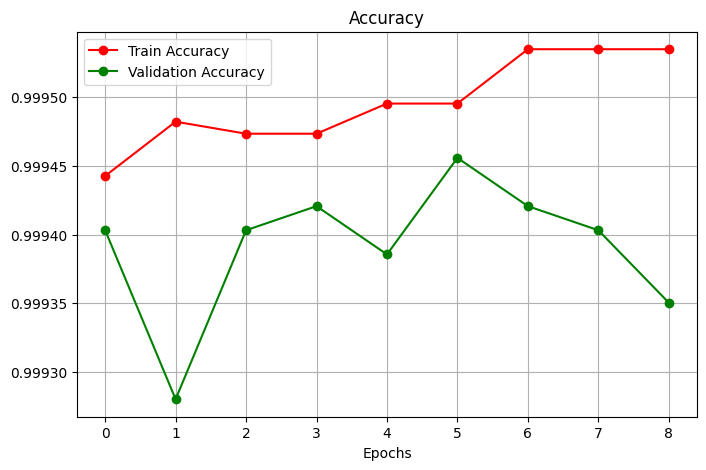

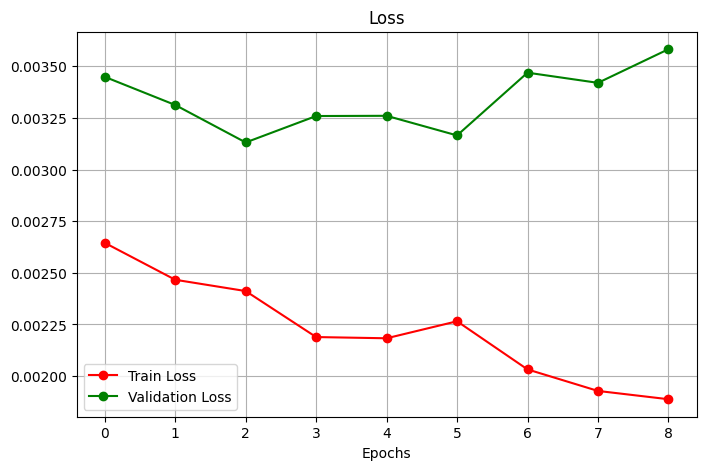

In [ ]:
# Train
train_acc = history_class_2.history['acc']
train_loss = history_class_2.history['loss']
# Validation
val_acc = history_class_2.history['val_acc']
val_loss = history_class_2.history['val_loss']

# Plotting section
# Accuracy
plt.figure(figsize=(8,5))
plt.plot(train_acc, 'r-o', label='Train Accuracy')
plt.plot(val_acc, 'g-o', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
# Loss
plt.figure(figsize=(8,5))
plt.plot(train_loss, 'r-o', label='Train Loss')
plt.plot(val_loss, 'g-o', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

In [ ]:
# classifier_2.save('/content/drive/MyDrive/ML_Aliyari/Mini_Project_3/classifier_2.h5')

In [ ]:
y_hat = classifier_2.predict(x_test_scaled)

1781/1781 [==============================] - 5s 3ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
report = classification_report(y_test, np.argmax(y_hat,axis=1), target_names=['no Scam', 'Scam'])
print(report)

              precision    recall  f1-score   support

     no Scam       1.00      1.00      1.00     56851
        Scam       0.85      0.81      0.83       111

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



Text(0.5, 1.0, 'Confusion Matrix for Test data')

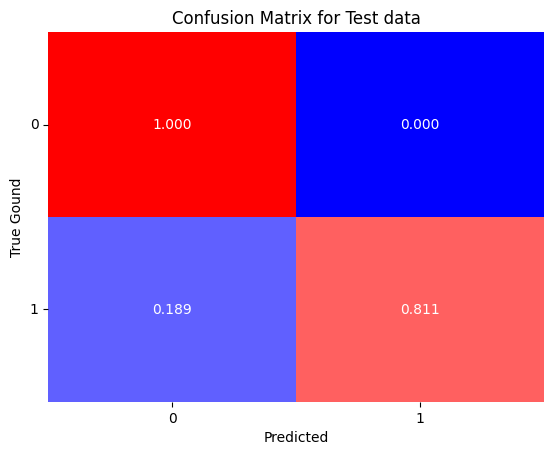

In [ ]:
cm = confusion_matrix(y_test, np.argmax(y_hat,axis=1))
cm = cm/np.sum(cm, axis=1).reshape(-1,1)
# Plotting confusion matrix
sns.heatmap(cm, annot=True, cmap='bwr', fmt='.3f',cbar=False);
plt.xticks(np.array(range(0,2)).astype('float32')+0.5, range(0,2));
plt.yticks(np.array(range(0,2)).astype('float32')+0.5, range(0,2), rotation=0);
plt.xlabel('Predicted')
plt.ylabel('True Gound')
plt.title('Confusion Matrix for Test data')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score

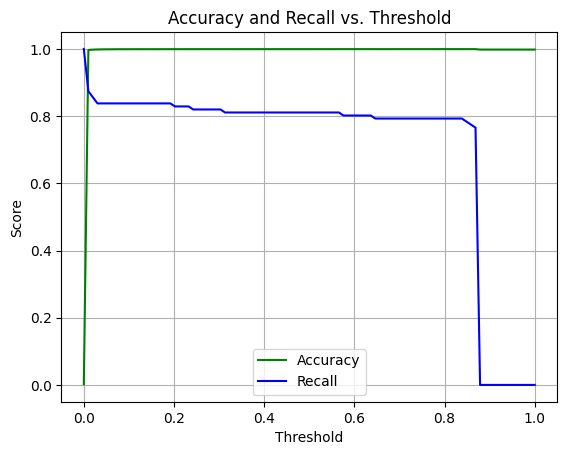

In [ ]:
# Make predictions on the validation or test data
y_pred = y_hat[:,1]
# Initialize arrays to store accuracy and recall values
thresholds = np.linspace(0, 1, 100)
accuracies = []
recalls = []

# Iterate over different thresholds
for threshold in thresholds:
    y_pred_binary = (y_pred > threshold).astype(int)
    accuracies.append(accuracy_score(y_test, y_pred_binary))
    recalls.append(recall_score(y_test, y_pred_binary))

# Plot accuracy and recall based on the threshold
plt.plot(thresholds, accuracies,'g-', label='Accuracy')
plt.plot(thresholds, recalls,'b', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Accuracy and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()
